In [24]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sales_data_1.csv')

df

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1
...,...,...,...,...,...,...
65,27/08/23,Vendor4,64.82,Customer6,87.45,18
66,27/08/23,Vendor8,88.79,Customer3,105.59,5
67,27/08/23,Vendor5,63.30,Customer5,92.92,32
68,27/08/23,Vendor5,94.06,Customer5,125.67,4


In [2]:
# What is their overall gross margin for their business?
df['Revenue'] = df['Selling price'] * df['Quantity sold']
df['Cost'] = df['Buying price'] * df['Quantity sold']
df['Profit'] = df['Revenue'] - df['Cost']

total_revenue = df['Revenue'].sum()
total_cost = df['Cost'].sum()
total_profit = df['Profit'].sum()

print(f'Total profit of SYA for the week is {total_profit:.2f}')

Total profit of SYA for the week is 31482.75


In [3]:
# Which vendor is the most profitable?
vendor_profit = df.groupby('Firm bought from')['Profit'].sum().sort_values(ascending=False)
print('Most profitable vendors for SYA:')
print(vendor_profit.head(1).to_string())

Most profitable vendors for SYA:
Firm bought from
Vendor4    6903.31


In [4]:
# Which customer is the least profitable?
df['Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
customer_profit = df.groupby('Customer')['Profit'].sum().sort_values()
print('The least profitable customer is:')
print(customer_profit.head(1).to_string()) 

The least profitable customer is:
Customer
Customer3    1055.05


In [5]:
# Which day of the week was most profitable for them?
df['Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
date_profit = df.groupby('Date')['Profit'].sum().sort_values(ascending=False)
print('The most profitable day of the week is:')
print(date_profit.head(1).to_string())

The most profitable day of the week is:
Date
21/08/23    6847.34


In [6]:
# Which day of the week was the least profitable for them?
df['Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
date_profit = df.groupby('Date')['Profit'].sum().sort_values()
print('The least profitable day of the week is:')
print(date_profit.head(1).to_string())

The least profitable day of the week is:
Date
27/08/23    3086.46


In [7]:
df = pd.read_csv("sales_data_2.csv")
df

,Date,Gross Profit,3-Day Average of Daily Gross Profit
0,2023-08-21,-6280.83,NaN
1,2023-08-22,-12285.39,NaN
2,2023-08-23,-8939.81,-9168.676667
3,2023-08-24,-4778.46,-8667.886667
4,2023-08-25,-10344.47,-8020.913333
5,2023-08-26,-8788.41,-7970.446667
6,2023-08-27,-14616.06,-11249.646667


In [ ]:
# Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv? 
df["Gross Profit"] = (df["Selling price"] * df["Quantity sold"]) - (df["Buying price"] * df["Quantity bought"])

df_daily = df.groupby("Date")["Gross Profit"].sum().reset_index()

df_daily["3-Day Average of Daily Gross Profit"] = df_daily["Gross Profit"].rolling(3).mean()

df_daily

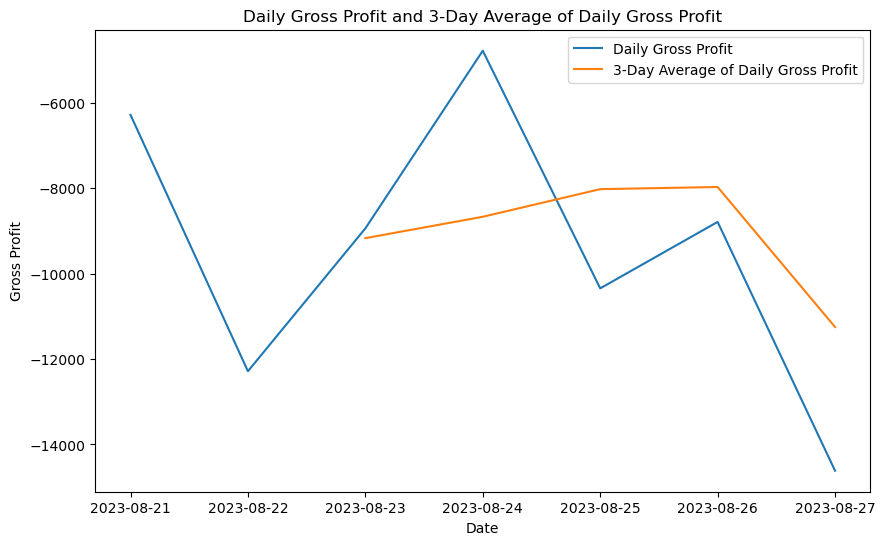

In [8]:
# Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.
plt.figure(figsize=(10,6))
plt.plot(df_daily["Date"], df_daily["Gross Profit"], label="Daily Gross Profit")
plt.plot(df_daily["Date"], df_daily["3-Day Average of Daily Gross Profit"], label="3-Day Average of Daily Gross Profit")
plt.xlabel("Date")
plt.ylabel("Gross Profit")
plt.title("Daily Gross Profit and 3-Day Average of Daily Gross Profit")
plt.legend()
plt.show()

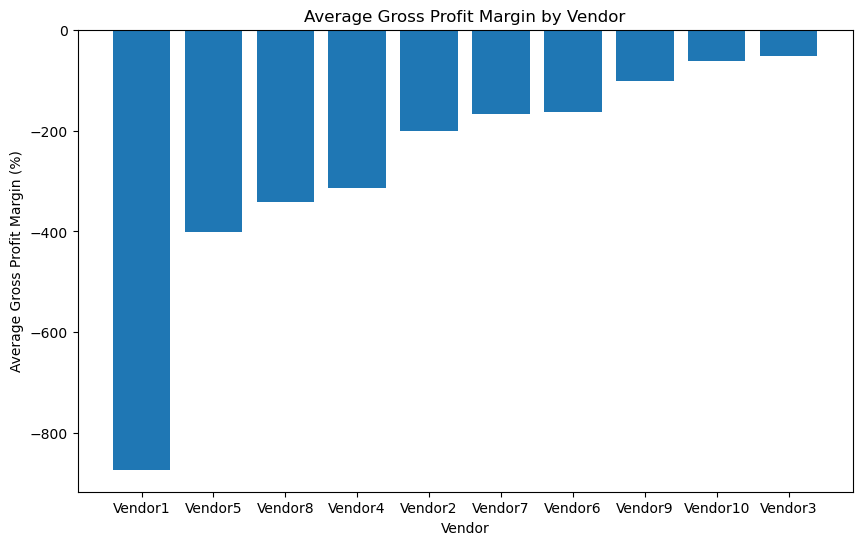

In [9]:
# 3. Can you optimize the sales process to ensure gross margin is maximized?
# Would you fire any vendor?
df["Gross Profit Margin"] = (df["Gross Profit"] / (df["Selling price"] * df["Quantity sold"])) * 100

df_vendor = df.groupby("Firm bought from")["Gross Profit Margin"].mean().reset_index()

df_vendor = df_vendor.sort_values(by="Gross Profit Margin", ascending=True)

plt.figure(figsize=(10,6))
plt.bar(df_vendor["Firm bought from"], df_vendor["Gross Profit Margin"])
plt.xlabel("Vendor")
plt.ylabel("Average Gross Profit Margin (%)")
plt.title("Average Gross Profit Margin by Vendor")
plt.show()

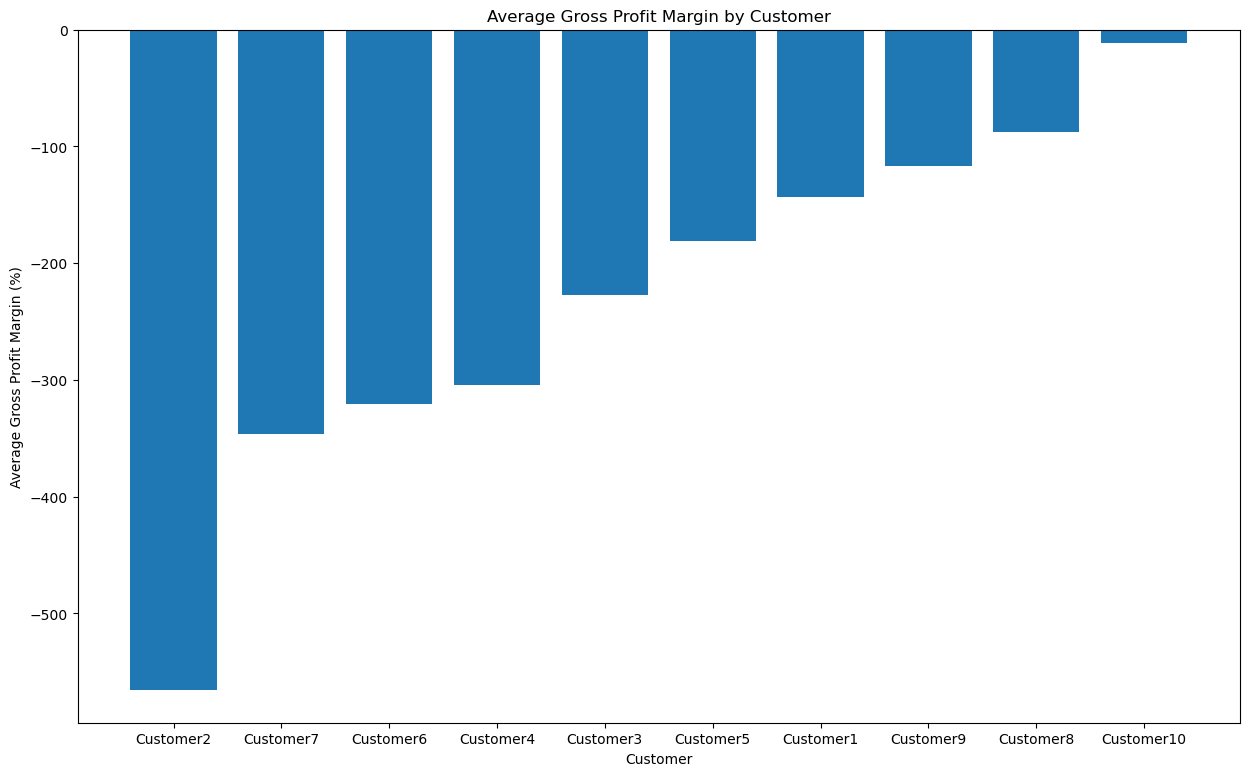

In [10]:
# Would you let go of any customer? 
df_customer = df.groupby("Customer")["Gross Profit Margin"].mean().reset_index()

df_customer = df_customer.sort_values(by="Gross Profit Margin", ascending=True)

plt.figure(figsize=(15,9))
plt.bar(df_customer["Customer"], df_customer["Gross Profit Margin"])
plt.xlabel("Customer")
plt.ylabel("Average Gross Profit Margin (%)")
plt.title("Average Gross Profit Margin by Customer")
plt.show()

In [11]:
# To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices?
buying_price_percentiles = df["Buying price"].quantile([0.25, 0.5, 0.75])

selling_price_percentiles = df["Selling price"].quantile([0.25, 0.5, 0.75])

print("The 25th, 50th, and 75th percentiles for buying price are:")
print(buying_price_percentiles.to_string())
print()
print("The 25th, 50th, and 75th percentiles for selling price are:")
print(selling_price_percentiles.to_string())

The 25th, 50th, and 75th percentiles for buying price are:
0.25    29.90
0.50    60.76
0.75    78.32

The 25th, 50th, and 75th percentiles for selling price are:
0.25     38.9750
0.50     78.9900
0.75    103.3975


In [12]:
# Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.
buying_price_percentiles = df["Buying price"].quantile([0.25, 0.5, 0.75])

selling_price_percentiles = df["Selling price"].quantile([0.25, 0.5, 0.75])

df["Buying Price Outlier"] = (df["Buying price"] < buying_price_percentiles[0.25]) | (df["Buying price"] > buying_price_percentiles[0.75])

df["Selling Price Outlier"] = (df["Selling price"] < selling_price_percentiles[0.25]) | (df["Selling price"] > selling_price_percentiles[0.75])

buying_price_outlier_count = df["Buying Price Outlier"].sum()
selling_price_outlier_count = df["Selling Price Outlier"].sum()

buying_price_outlier_percentage = (buying_price_outlier_count / len(df)) * 100
selling_price_outlier_percentage = (selling_price_outlier_count / len(df)) * 100

print(f"The number of transactions where the buying price is below the 25th percentile or above the 75th percentile is {buying_price_outlier_count}.")
print(f"The percentage of transactions where the buying price is below the 25th percentile or above the 75th percentile is {buying_price_outlier_percentage:.2f}%.")
print(f"The number of transactions where the selling price is below the 25th percentile or above the 75th percentile is {selling_price_outlier_count}.")
print(f"The percentage of transactions where the selling price is below the 25th percentile or above the 75th percentile is {selling_price_outlier_percentage:.2f}%.")

The number of transactions where the buying price is below the 25th percentile or above the 75th percentile is 36.
The percentage of transactions where the buying price is below the 25th percentile or above the 75th percentile is 51.43%.
The number of transactions where the selling price is below the 25th percentile or above the 75th percentile is 36.
The percentage of transactions where the selling price is below the 25th percentile or above the 75th percentile is 51.43%.


In [13]:
# Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin? 
df["Gross Profit"] = (df["Selling price"] * df["Quantity sold"]) - (df["Buying price"] * df["Quantity bought"])

df["Gross Profit Margin"] = (df["Gross Profit"] / (df["Selling price"] * df["Quantity sold"])) * 100

total_revenue = df["Selling price"].sum()
total_gross_profit = df["Gross Profit"].sum()

original_gross_margin = (total_gross_profit / total_revenue) * 100

print(f"The original gross profit margin is {original_gross_margin:.2f}%.")

df_vendor4 = df[df["Firm bought from"] == "Vendor4"]

vendor4_revenue = df_vendor4["Selling price"].sum()
vendor4_gross_profit = df_vendor4["Gross Profit"].sum()

vendor4_gross_margin = (vendor4_gross_profit / vendor4_revenue) * 100

print(f"The gross profit margin for Vendor 4 is {vendor4_gross_margin:.2f}%.")

new_cogs_vendor4 = df_vendor4["Buying price"].sum() * 1.1 * 1.1

new_gross_profit_vendor4 = vendor4_revenue - new_cogs_vendor4

new_vendor4_gross_margin = (new_gross_profit_vendor4 / vendor4_revenue) * 100

print(f"The new gross profit margin for Vendor 4 is {new_vendor4_gross_margin:.2f}%.")

new_total_gross_profit = total_gross_profit - vendor4_gross_profit + new_gross_profit_vendor4

new_gross_margin = (new_total_gross_profit / total_revenue) * 100

print(f"The new gross profit margin for the whole data is {new_gross_margin:.2f}%.")

difference = original_gross_margin - new_gross_margin

print(f"The difference between the original and the new gross profit margin is {difference:.2f} percentage points.")

The original gross profit margin is -1276.27%.
The gross profit margin for Vendor 4 is -923.92%.
The new gross profit margin for Vendor 4 is 6.77%.
The new gross profit margin for the whole data is -1142.93%.
The difference between the original and the new gross profit margin is -133.34 percentage points.


In [33]:
# Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)
# What’s the theoretical max margin the firm could have from that branch?
df = pd.read_csv("sales_data_2.csv")

df["Gross Profit"] = (df["Selling price"] * df["Quantity sold"]) - (df["Buying price"] * df["Quantity bought"])

df["Gross Profit Margin"] = (df["Gross Profit"] / (df["Selling price"] * df["Quantity sold"])) * 100

total_revenue = df["Selling price"].sum()
total_gross_profit = df["Gross Profit"].sum()

original_gross_margin = (total_gross_profit / total_revenue) * 100

print(f"The original gross profit margin is {original_gross_margin:.2f}%.")

df_grouped = df.groupby("Firm bought from").agg({"Gross Profit Margin": "mean"})

df_sorted = df_grouped.sort_values(by="Gross Profit Margin", ascending=False)

df_sorted

best_vendor = df_sorted.index[0]
best_vendor_margin = df_sorted.iloc[0,0]

print(f"The best vendor to have a strategic tie up with is {best_vendor}, with a gross profit margin of {best_vendor_margin:.2f}%.")

df_best_vendor = df[df["Firm bought from"] == best_vendor]

best_vendor_revenue = df_best_vendor["Selling price"].sum()
best_vendor_gross_profit = df_best_vendor["Gross Profit"].sum()

new_total_revenue = best_vendor_revenue * (len(df) / len(df_best_vendor))
new_total_gross_profit = best_vendor_gross_profit * (len(df) / len(df_best_vendor))

new_gross_margin = (new_total_gross_profit / new_total_revenue) * 100

print(f"The new gross profit margin for the whole data is {new_gross_margin:.2f}%.")

difference = new_gross_margin - original_gross_margin

print(f"The difference between the original and the new gross profit margin is {difference:.2f} percentage points.")


The original gross profit margin is -1276.27%.
The best vendor to have a strategic tie up with is Vendor3, with a gross profit margin of -52.40%.
The new gross profit margin for the whole data is -312.73%.
The difference between the original and the new gross profit margin is 963.54 percentage points.


In [23]:
# Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down) 
df_sapota = df[df["Firm bought from"] == "Vendor7"]

df_sapota["% Change in Quantity Demanded"] = df_sapota["Quantity sold"].pct_change()
df_sapota["% Change in Price"] = df_sapota["Selling price"].pct_change()
df_sapota["Price Elasticity of Demand"] = df_sapota["% Change in Quantity Demanded"] / df_sapota["% Change in Price"]

df_sapota

C:\Users\kiruthikkumaar\AppData\Local\Temp\ipykernel_30644\2415368580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sapota["% Change in Quantity Demanded"] = df_sapota["Quantity sold"].pct_change()
C:\Users\kiruthikkumaar\AppData\Local\Temp\ipykernel_30644\2415368580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sapota["% Change in Price"] = df_sapota["Selling price"].pct_change()
C:\Users\kiruthikkumaar\AppData\Local\Temp\ipykernel_30644\2415368580.py:9: SettingWithCopyWarning: 
A value i

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Gross Profit,Gross Profit Margin,% Change in Quantity Demanded,% Change in Price,Price Elasticity of Demand
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,213.52,13.718838,NaN,NaN,NaN
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7,-2772.91,-613.869518,-0.533333,-0.378084,1.410621
16,2023-08-22,Vendor7,89.79,61,Customer1,111.92,25,-2679.19,-95.753753,2.571429,0.734387,3.501462
19,2023-08-22,Vendor7,58.42,8,Customer6,68.74,3,-261.14,-126.631752,-0.880000,-0.385811,2.280908
20,2023-08-23,Vendor7,55.24,45,Customer2,72.22,19,-1113.62,-81.156991,5.333333,0.050626,105.348659
24,2023-08-23,Vendor7,27.75,22,Customer1,30.86,3,-517.92,-559.429682,-0.842105,-0.572695,1.470427
32,2023-08-24,Vendor7,26.29,55,Customer10,38.53,55,673.20,31.767454,17.333333,0.248542,69.740113
35,2023-08-24,Vendor7,93.63,94,Customer7,119.13,23,-6061.23,-221.213581,-0.581818,2.091876,-0.278132
36,2023-08-24,Vendor7,24.75,20,Customer8,31.49,19,103.31,17.266969,-0.173913,-0.735667,0.236402
39,2023-08-24,Vendor7,15.42,9,Customer2,22.79,7,20.75,13.006958,-0.631579,-0.276278,2.286025
